# Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:

i. Which variables are significant in predicting the demand for shared bikes.

ii. How well those variables describe the bike demands

Goal:

i. Develop a model to find the variables which are significant to the demand for shared bikes with the available independent variables.

ii. It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

# Step 1: Importing Libraries


In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Step 2: Reading Dataset and Understanding Data

In [3]:
# Read the data from csv file

df = pd.read_csv('Documents/datasets/day.csv')



In [4]:
#Inspect first few rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# checking the shape of dataframe

df.shape

(730, 16)

In [6]:
# describing the columns of dataframe

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#checking dataframe for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# checking for the null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# renaming few columns for better readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)


In [10]:
# dropping the duplicates
df.drop_duplicates(inplace=True)


In [11]:
# re-verifying the shape of new dataframe

df.shape

(730, 16)

As the shape is same after dropping duplicates, that means there are no duplicates in the dataframe.


# Step 3: Cleaning Data

## 3.1 Droping columns that are not useful for analysis


In [12]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business

df['days_old'] = (pd.to_datetime(df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)


## 3.2 Handling Outliers


In [13]:
#Checking number of unique values in all columns
df.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
days_old      730
dtype: int64

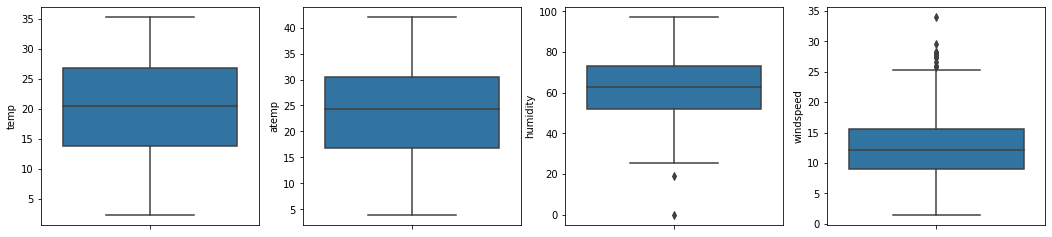

In [14]:
# Drawing box plots for independent variables with continuous values
cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

# Step 4: Exploratory Data Analysis

In [15]:
# Encoding/mapping the season column

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [16]:
# Encoding/mapping the month column

df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})


In [17]:
# Encoding/mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [18]:
# Encoding/mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Good',2:'Moderate',3:'Bad',4:'Severe'})

In [19]:
# check the head of the dataset

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,Moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,Moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,Good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,Good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,Good,9.305237,11.46350,43.6957,12.522300,1600,4


In [20]:
# check the column info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 79.8+ KB


## 4.1 Drawing pair plots to check the linear relationship


<Figure size 1080x2160 with 0 Axes>

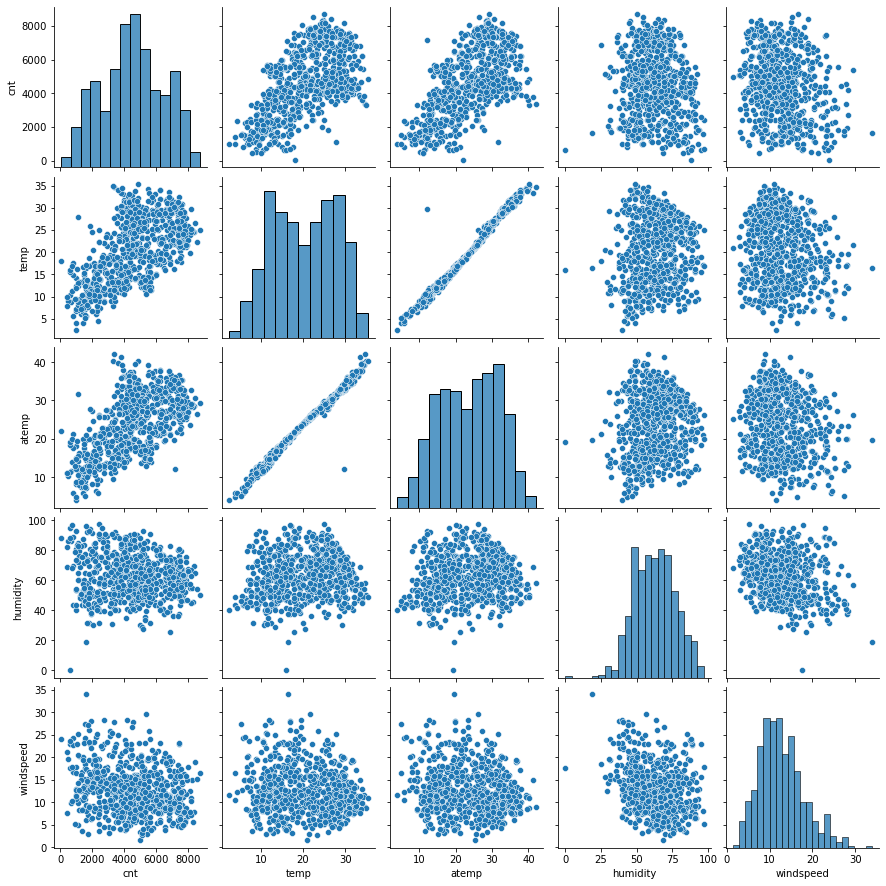

In [21]:
#Drawing pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'humidity','windspeed'])
plt.show()

## Inference:
i) Looks like the temp and atemp has the highest corelation with the target variable cnt

ii) temp and atemp are highly co-related with each other

### As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp.

## 4.2 Visualising the Data to Find the Correlation between the Numerical Variable


<Figure size 1440x1080 with 0 Axes>

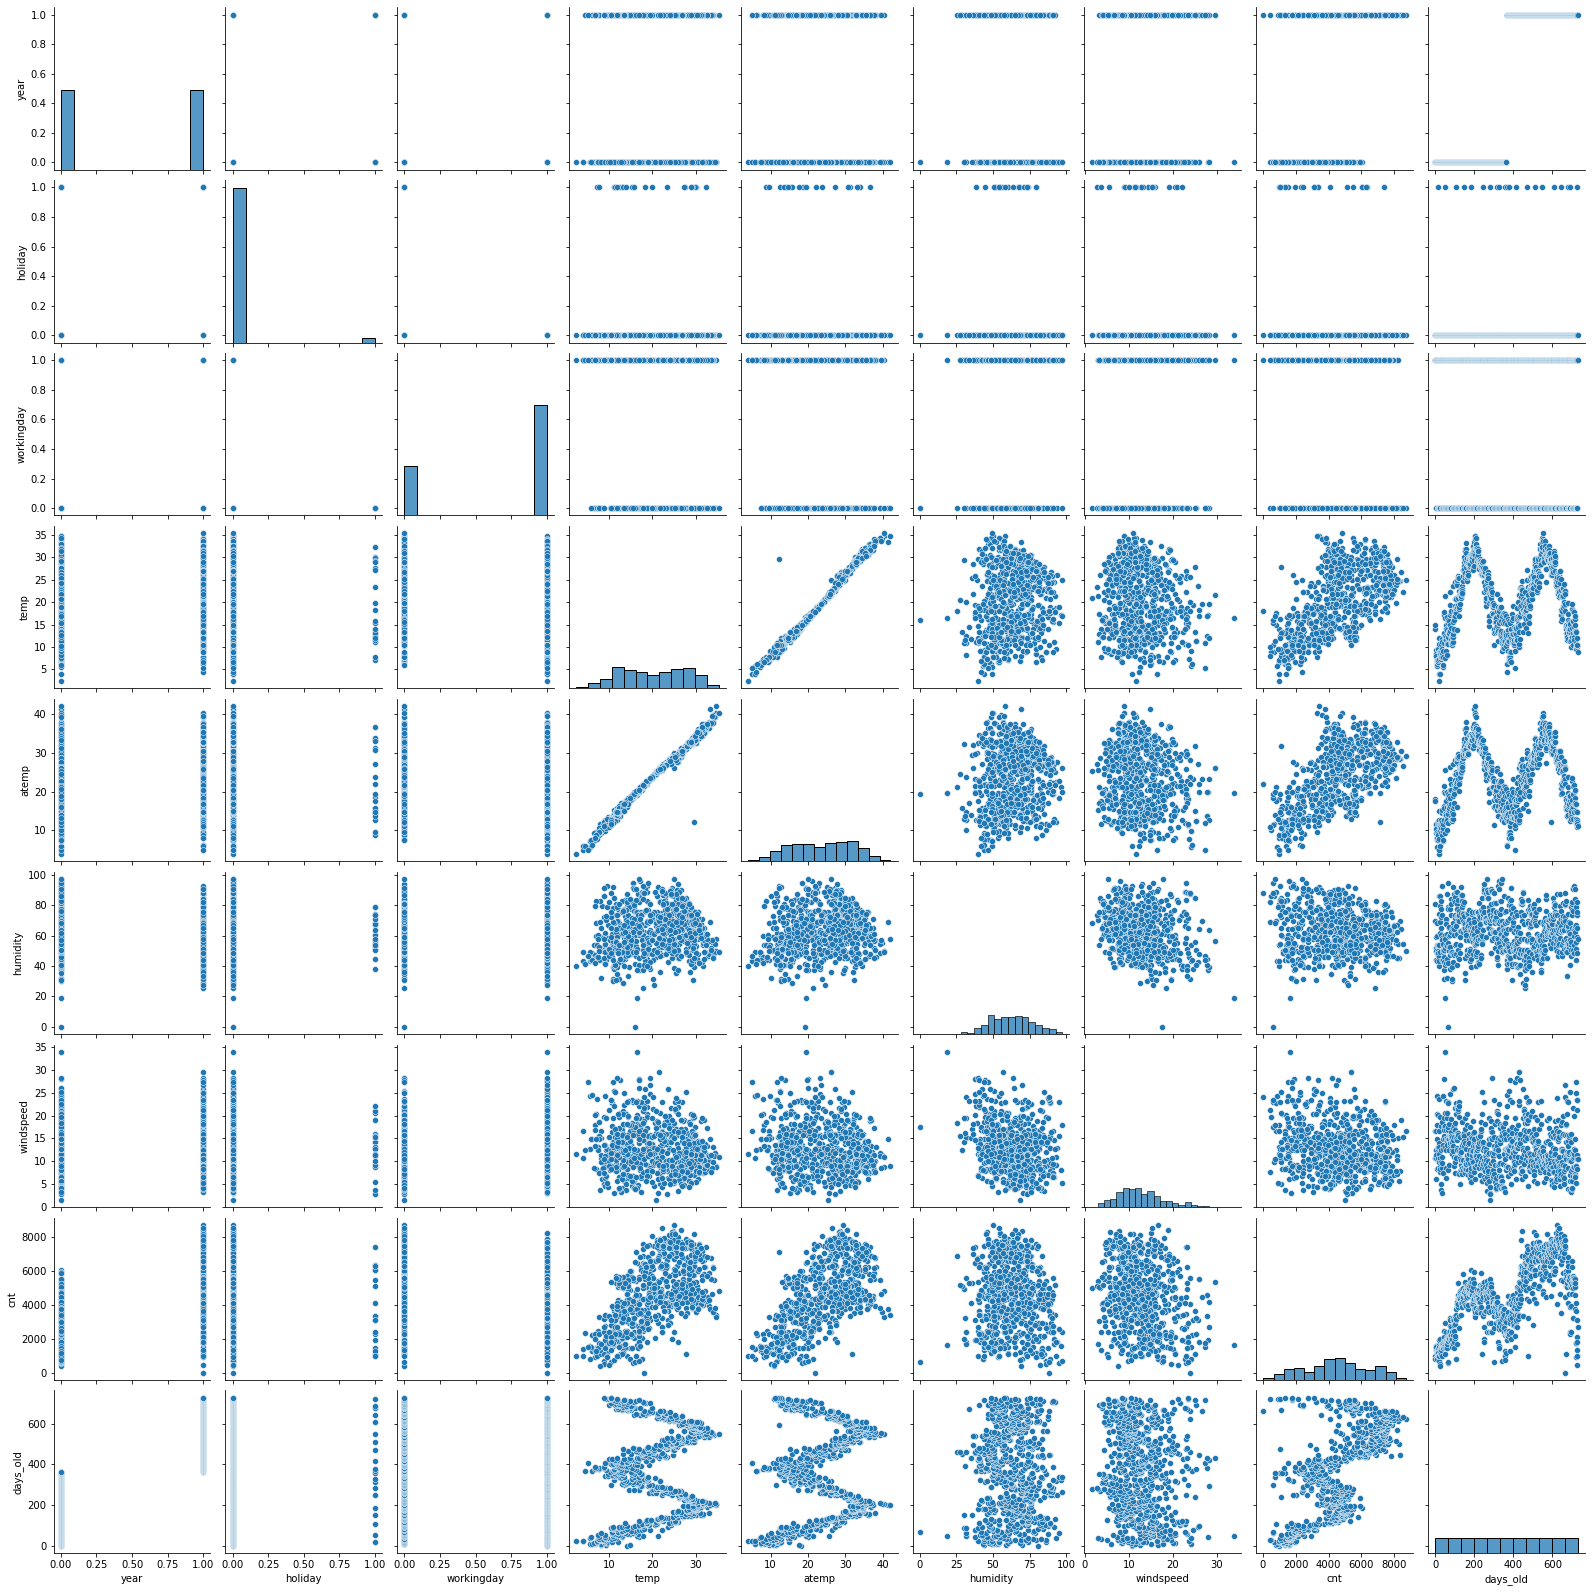

In [22]:
plt.figure(figsize=(20,15))
sns.pairplot(df)
plt.show()

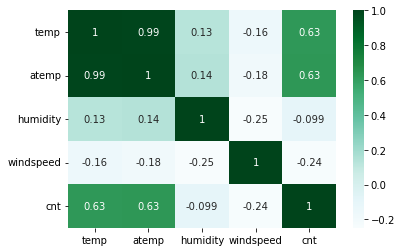

In [23]:
# Checking continuous variables relationship with each other
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

### Here we see that temp and atemp has correlation more than 0.99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only

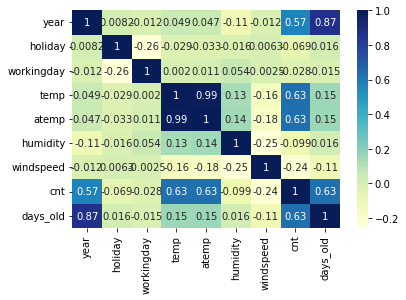

In [24]:
#Correlations for numeric variables
cor=df.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

## 4.3 Drawing Heatmap of correlation between variables


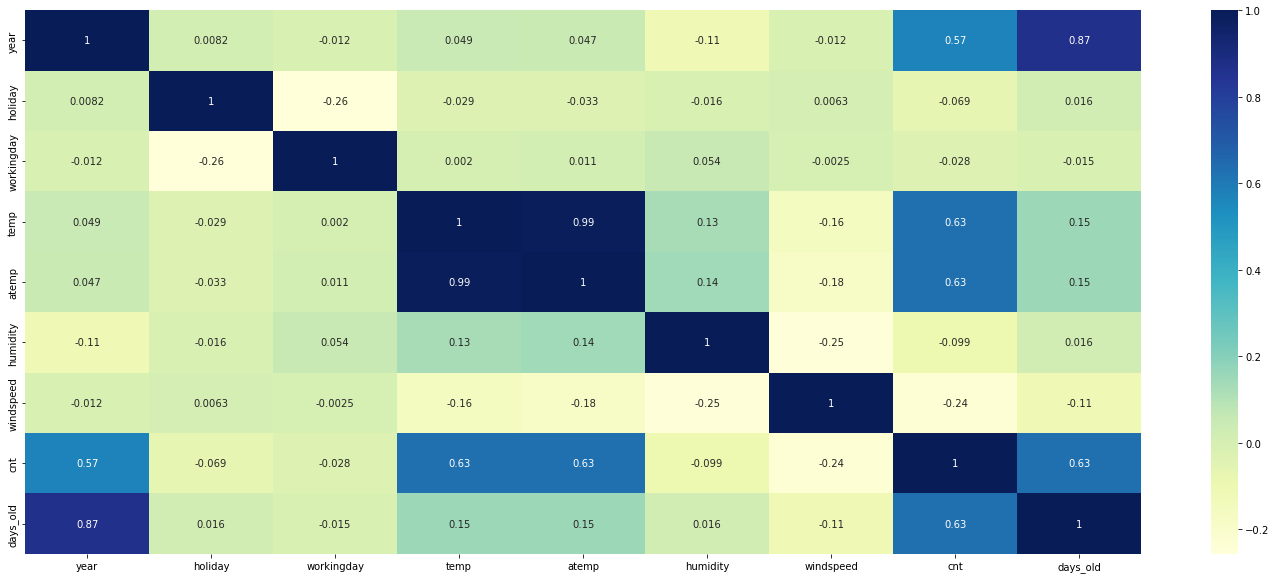

In [25]:
#Calculate Correlation
corr = df.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

### From the correlation map, temp, atemp and days_old seems to be highly correlated and only should variable can be considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.
### We also see Target variable has a linear relationship with some of the independent variables. Good sign for building a linear regression Model.

## 4.4 Analysing Categorical Variables with target variables


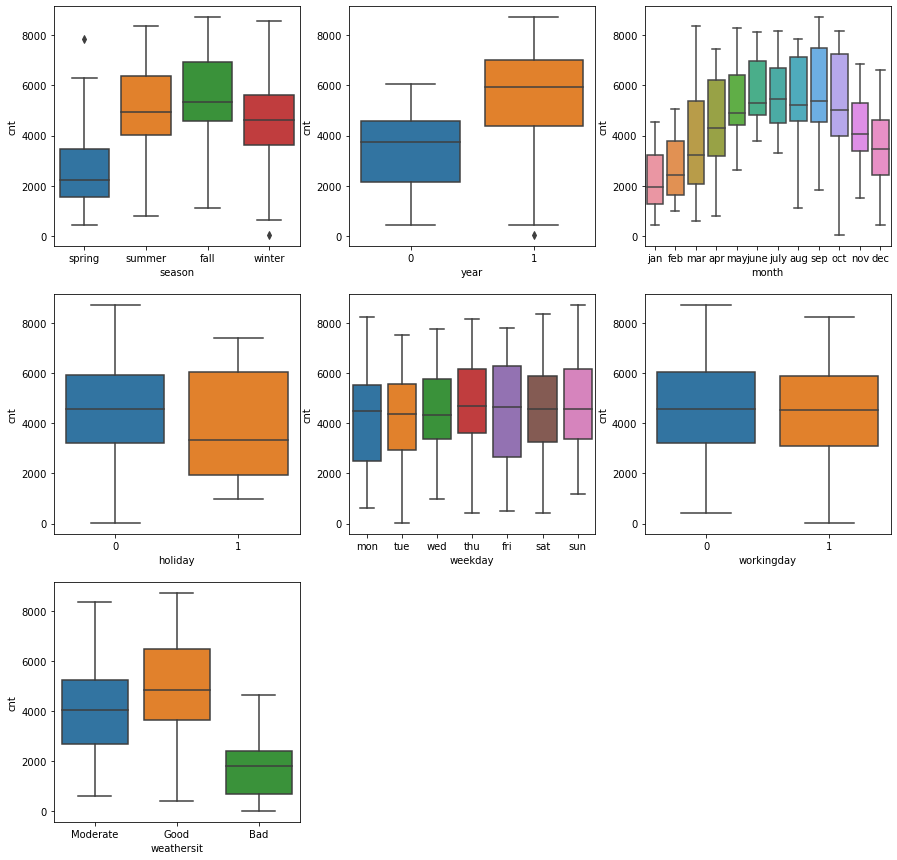

In [26]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','year','month','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
plt.show()

## Inference:

Here are some insights that can be drawn from the plots

1. Season: 3:fall has highest demand for rental bikes
2. We can see that demand for next year has grown
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture abount demand.
6. The clear weathershit has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions.

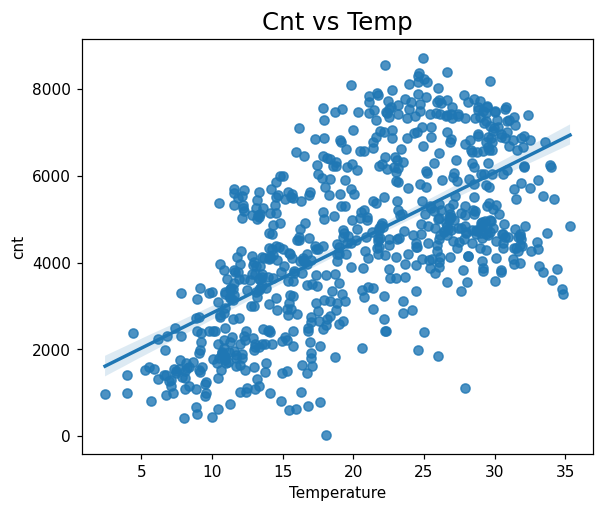

In [27]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

### Inference:
i) Demand for bikes is positively correlated to temp.

ii) We can see that cnt is linearly increasing with temp indicating linear relation.

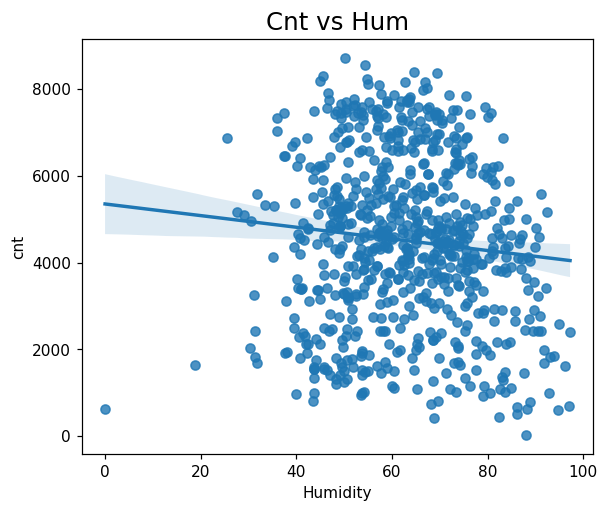

In [28]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=df,y="cnt",x="humidity")
plt.xlabel("Humidity")
plt.show()

### Inference:
i) Humidity values are more scattered around.

ii) Although we can see cnt decreasing with increase in humidity.

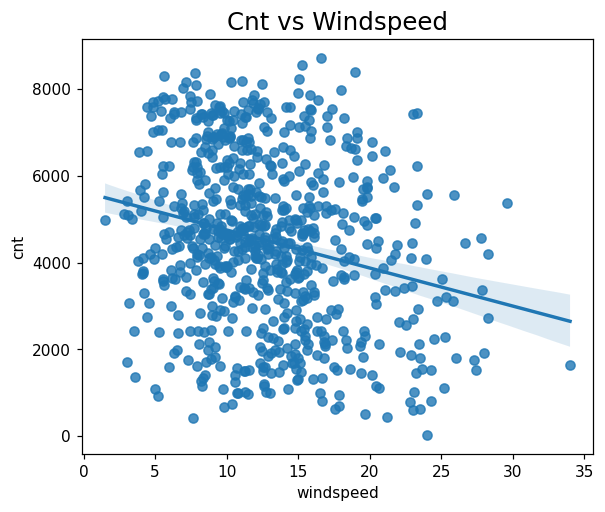

In [29]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=df,y="cnt",x="windspeed")
plt.show()

### Inference:
i) Windspeed is values are more scattered around.

ii) Although we can see cnt decreasing with increase in windspeed.

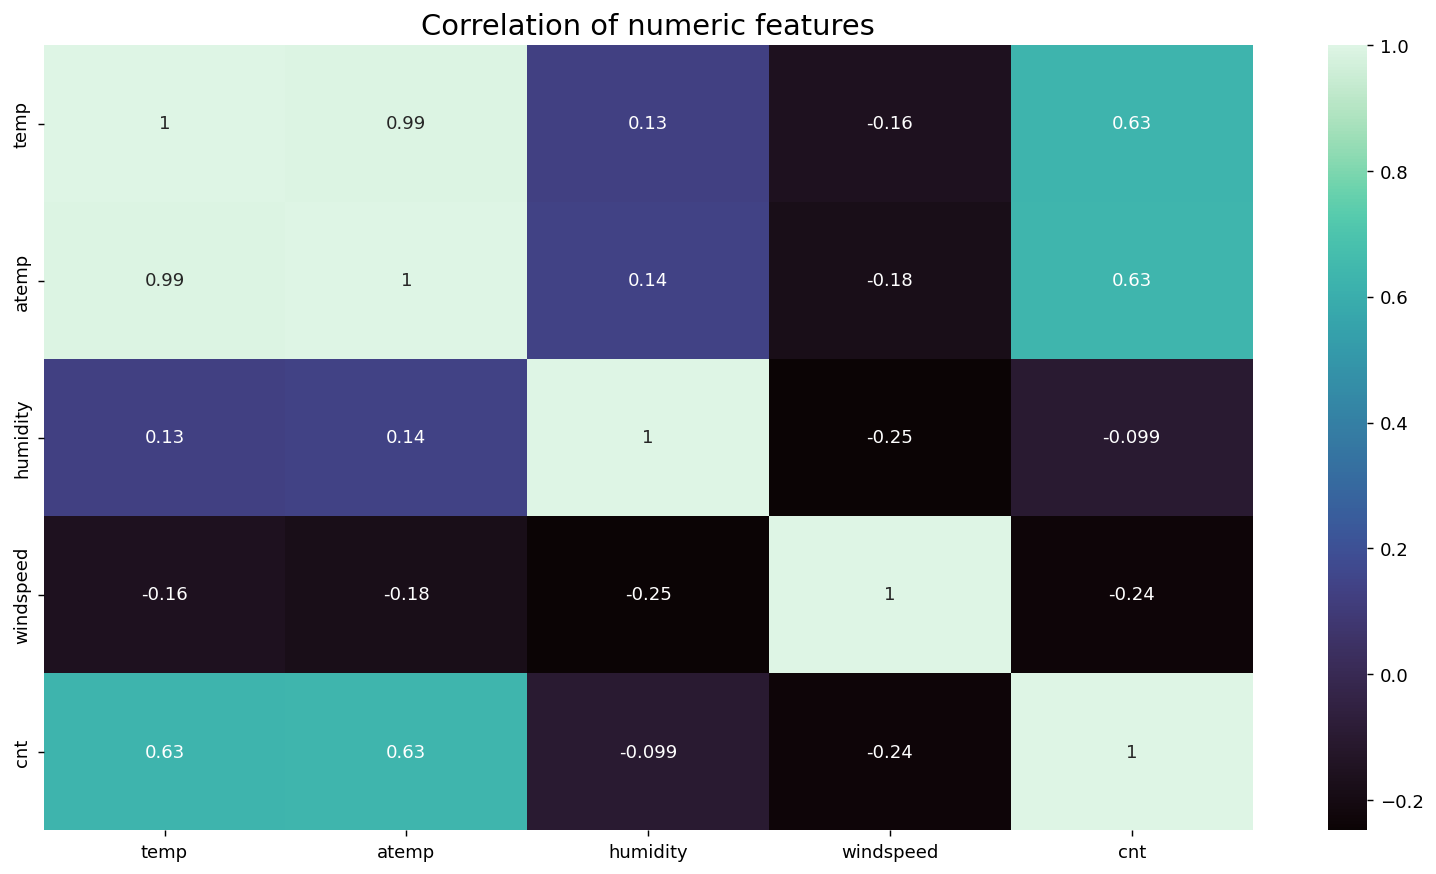

In [30]:
num_features = ["temp","atemp","humidity","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(df[num_features].corr(),annot= True,cmap="mako")
plt.show()

### Inference:
i) Temp and Atemp are highly correlated, we can take an action to remove one of them, but lets keep them for further analysis.

ii) Temp and Atemp also have high correlation with cnt variable.

## Step 5: Data Preparation for Linear Regression


## 5.1 Creating dummy variables for all categorical variables


In [31]:
df = pd.get_dummies(data=df,columns=["season","month","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])

i) Dropping the first columns as (p-1) dummies can explain p categories.

ii) In weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [32]:
#Checking columns after creating dummies
df.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'days_old', 'season_spring', 'season_summer',
       'season_winter', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_july', 'month_june', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_Bad',
       'weathersit_Good', 'weathersit_Moderate'],
      dtype='object')

In [33]:
#Inspecting few rows
df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,days_old,season_spring,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


## 5.2 Splitting the Data into Training and Testing Sets


In [34]:
# Checking shape before splitting
df.shape

(730, 32)

In [35]:
#y to contain only target variable
y=df.pop('cnt')

#X is all remainign variable also our independent variables
X=df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
#Inspecting independent variables
X.head()


,year,holiday,workingday,temp,atemp,humidity,windspeed,days_old,season_spring,season_summer,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


## 5.3 Feature Scaling continuous variables


To make all features in same scale to interpret easily

Following columns are continous and to be scaled temp,hum,windspeed.

In [38]:
# Let us scale continuous variables
num_vars = ['temp','atemp','humidity','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [39]:
#Inspect stats fro Training set after scaling
X_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,days_old,season_spring,season_summer,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,373.545988,0.230920,0.258317,...,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,213.063061,0.421834,0.438138,...,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,185.500000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,380.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,561.500000,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,729.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
X_train.head()


,year,holiday,workingday,temp,atemp,humidity,windspeed,days_old,season_spring,season_summer,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,683,0,0,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,645,0,0,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,163,0,1,...,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,360,1,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,640,0,0,...,0,0,0,0,1,0,0,0,0,1


## 5.4 Building a Model using RFE and Automated approach


In [41]:
#Using RFE to eliminate some columns
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
#Cutting down number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [43]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 13),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('days_old', False, 17),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('month_aug', False, 12),
 ('month_dec', True, 1),
 ('month_feb', False, 9),
 ('month_jan', False, 15),
 ('month_july', True, 1),
 ('month_june', False, 10),
 ('month_mar', True, 1),
 ('month_may', False, 2),
 ('month_nov', True, 1),
 ('month_oct', False, 4),
 ('month_sep', True, 1),
 ('weekday_mon', False, 5),
 ('weekday_sat', False, 14),
 ('weekday_sun', False, 11),
 ('weekday_thu', False, 16),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 6),
 ('weathersit_Bad', True, 1),
 ('weathersit_Good', True, 1),
 ('weathersit_Moderate', False, 3)]

## 5.5 Manual elimination


Function to build a model using statsmodel api


In [44]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

Function to calculate VIFs and print them


In [45]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))


In [46]:
#Printing Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['year', 'holiday', 'temp', 'atemp', 'humidity', 'windspeed',
       'season_spring', 'season_winter', 'month_dec', 'month_july',
       'month_mar', 'month_nov', 'month_sep', 'weathersit_Bad',
       'weathersit_Good'],
      dtype='object')

In [47]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'days_old', 'season_summer', 'month_aug', 'month_feb',
       'month_jan', 'month_june', 'month_may', 'month_oct', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_Moderate'],
      dtype='object')

In [48]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_jan', 'month_july', 'month_sep', 'weekday_sat',
       'weathersit_Bad', 'weathersit_Moderate']]

In [49]:
X_train_rfe.shape


(511, 15)

## Step 6: Model Building


### 6.1 Model 1 - Start with all variables selected by RFE


In [50]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_jan', 'month_july', 'month_sep', 'weekday_sat',
       'weathersit_Bad', 'weathersit_Moderate']

build_model(cols)
get_vif(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     165.0
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          1.70e-181
Time:                        10:24:27   Log-Likelihood:                -4134.9
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     495   BIC:                             8370.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2809.2461    

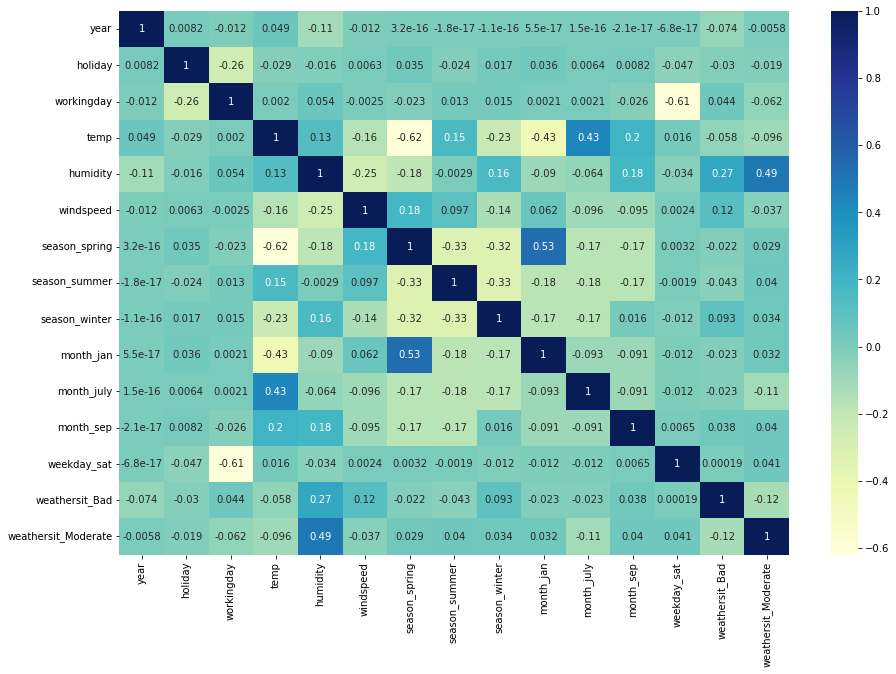

In [51]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(df[['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_jan', 'month_july', 'month_sep', 'weekday_sat',
       'weathersit_Bad', 'weathersit_Moderate']].corr(), cmap='YlGnBu', annot=True)
plt.show()

### 6.2 Model 2

In [52]:
# Dropping the variable month_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_july', 'month_sep', 'weekday_sat',
       'weathersit_Bad', 'weathersit_Moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          1.35e-182
Time:                        10:24:27   Log-Likelihood:                -4135.0
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     496   BIC:                             8363.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2792.2799    

### 6.3 Model 3


All the columns have p-value > .05 so checking VIFs


In [53]:
# Dropping the variable humidity as it has negative coefficient and is insignificant as it has high p-value
cols = ['year', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_july', 'month_sep', 'weekday_sat',
       'weathersit_Bad', 'weathersit_Moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.6
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          3.37e-180
Time:                        10:24:27   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8315.
Df Residuals:                     497   BIC:                             8374.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2004.0762    

### 6.4 Module 4


In [54]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['year', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_july', 'month_sep', 'weekday_sat',
       'weathersit_Bad', 'weathersit_Moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.1
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          1.51e-178
Time:                        10:24:27   Log-Likelihood:                -4150.1
No. Observations:                 511   AIC:                             8326.
Df Residuals:                     498   BIC:                             8381.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1845.8415    

### 6.5 Model 5

In [55]:
# Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value
cols = ['year', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_sep', 'weekday_sat',
       'weathersit_Bad', 'weathersit_Moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.0
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          8.20e-179
Time:                        10:24:27   Log-Likelihood:                -4152.2
No. Observations:                 511   AIC:                             8328.
Df Residuals:                     499   BIC:                             8379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1779.2943    

### 6.6 Model 6

In [56]:
# Dropping the variable temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['year', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_sep', 'weekday_sat',
       'weathersit_Bad', 'weathersit_Moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     156.8
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          4.14e-147
Time:                        10:24:27   Log-Likelihood:                -4229.9
No. Observations:                 511   AIC:                             8482.
Df Residuals:                     500   BIC:                             8528.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5070.0855    

### 6.7 Model 7

In [57]:
## Trying to replace July with spring as both were highly correlated

cols = ['year', 'workingday', 'windspeed', 'month_july',
       'season_summer', 'season_winter', 'month_sep', 'weekday_sat',
       'weathersit_Bad', 'weathersit_Moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     74.53
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           1.84e-92
Time:                        10:24:27   Log-Likelihood:                -4359.5
No. Observations:                 511   AIC:                             8741.
Df Residuals:                     500   BIC:                             8788.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3428.8800    

### 6.8 Model 8


In [58]:
# Removing windspeed with spring as windspeed was highly correlated with temp
cols = ['year', 'workingday', 'season_spring', 'month_july',
       'season_summer', 'season_winter', 'month_sep', 'weekday_sat',
       'weathersit_Bad', 'weathersit_Moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     148.1
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          1.75e-142
Time:                        10:24:27   Log-Likelihood:                -4240.9
No. Observations:                 511   AIC:                             8504.
Df Residuals:                     500   BIC:                             8550.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4618.6083    

### 6.9 Model 9

In [59]:
# using the weekend "Sunday" which was dropped during RFE instead of Saturday.

cols = ['year', 'workingday', 'season_spring', 'month_july',
       'season_summer', 'season_winter', 'month_sep', 'weekday_sun',
       'weathersit_Bad', 'weathersit_Moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     147.6
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          3.20e-142
Time:                        10:24:27   Log-Likelihood:                -4241.5
No. Observations:                 511   AIC:                             8505.
Df Residuals:                     500   BIC:                             8552.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4681.2816    

### 6.10 Model 10

In [60]:
# adding temp and removed 'season_summer' and 'workingday'
cols = ['year', 'season_spring', 'month_july',
        'season_winter', 'month_sep', 'weekday_sun',
       'weathersit_Bad', 'weathersit_Moderate', 'temp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          9.73e-178
Time:                        10:24:28   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

### Inference
Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.821 Let us select Model 11 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [61]:
#Building a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [62]:
#Building the finalmodel using sklearn
cols = ['year', 'season_spring', 'month_july',
        'season_winter', 'month_sep', 'weekday_sun',
       'weathersit_Bad', 'weathersit_Moderate', 'temp']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1740.7372440164268 [ 1994.67955569 -1167.70089558  -514.63181313   496.75430396
   465.92729708   190.37518346 -2256.10482681  -662.38986442
  3984.25555511]


## Step 7: Model Evaluation

### 7.1 Residual Analysis


In [63]:
y_train_pred = lr.predict(X_train[cols])


In [64]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

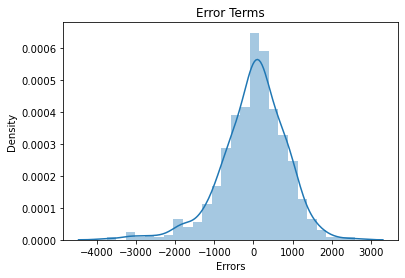

In [65]:
plot_res_dist(y_train, y_train_pred)


Errors are normally distribured here with mean 0. So everything seems to be fine


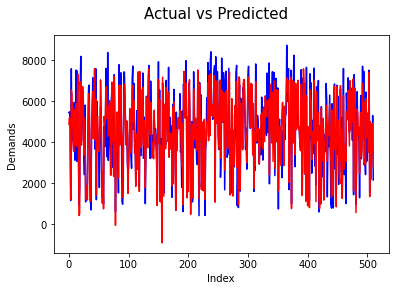

In [66]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and Predicted result following almost the same pattern so this model seems ok


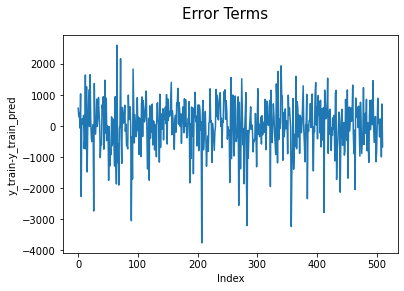

In [67]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

Here,If we see the error terms are independent of each other.


In [68]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8158045196281631

## Inference
R2 Same as we obtained for our final model

## 7.2 Linearity Check


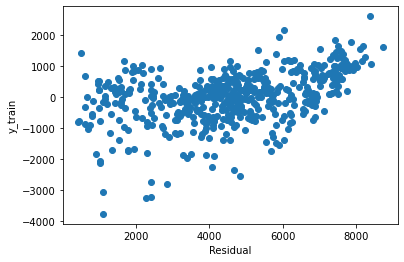

In [69]:
# scatter plot to check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()


## 7.3 Predict values for test data set


In [70]:
#Scale variables in X_test
num_vars = ['temp','atemp','humidity','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [71]:
#Columns from our final model
cols = ['year', 'season_spring', 'month_july',
        'season_winter', 'month_sep', 'weekday_sun',
       'weathersit_Bad', 'weathersit_Moderate', 'temp']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

## 7.4 R-Squared value for test predictions


In [72]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)


0.8127228702995221

## 7.5 Homoscedacity


### Inference
R2 value for predictions on test data (0.815) is almost same as R2 value of train data(0.818). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

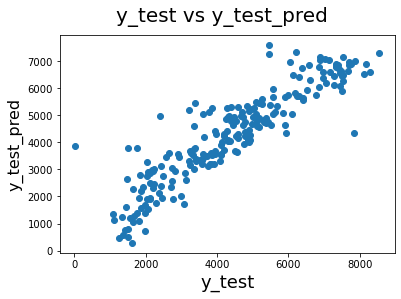

In [73]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

### Inference
We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

## 7.8 Plot Test vs Predicted test values


In [74]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

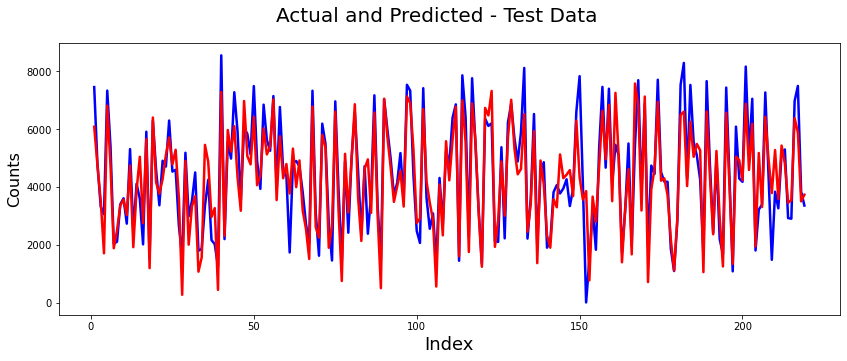

In [75]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

### Inference
As we can see predictions for test data is very close to actuals

## 7.9 Plot Error Terms for test data


In [76]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

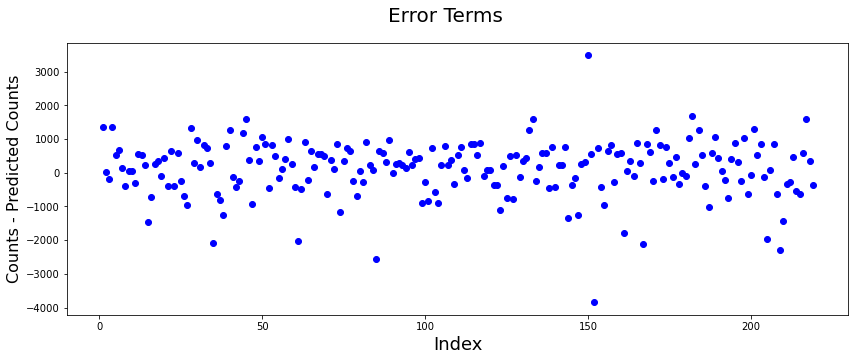

In [77]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

### Inference
As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

## 8. Making Predictions


In [78]:
# Checking data before scaling
df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,days_old,season_spring,season_summer,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,0,1,0


## 8.1 Intrepretting the Model


### Let's interpret the RFE with Manual model results as we give more importance to imputation

In [79]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['year', 'season_spring', 'month_july',
        'season_winter', 'month_sep', 'weekday_sun',
       'weathersit_Bad', 'weathersit_Moderate', 'temp']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          9.73e-178
Time:                        10:24:28   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

### Interepretation of results


#### Analysing the above model, the company should focus on the following features:
i) Company should focus on expanding business during Spring.

ii) Company should focus on expanding business during September.

iii) Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.

iv) There would be less bookings during Light Snow or Rain, they could probably use this time to service the bikes without having business impact.

#### Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.


## Conclusion
Significant variables to predict the demand for shared bikes:

i) holiday

ii) temp

iii) humidity

iv) windspeed

v) Season

vi) months(January, July, September, November, December)

vii) Year (2019)

viii) Sunday

ix) weathersit( Light Snow, Mist + Cloudy)